In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import numpy.matlib 
import math

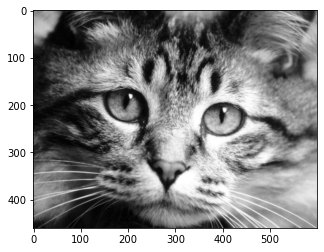

In [3]:
img = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)                         
plt.imshow(img,'gray')

Question 1

26.0 150.0 (79, 47) (418, 191)
0.0 255.0 (79, 47) (418, 191)


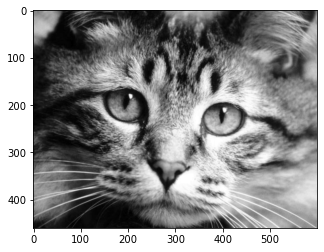

In [4]:
def stretch(img):
    a = 0
    b = 255
    c = img.min()
    d = img.max()
    x = img.shape[0]
    y = img.shape[1]
    slope = (b-a)/(d-c)
    output = img.copy()
    for i in range(0,x):
        for j in range(0,y):
            output[i][j] = (img[i][j]-c)*slope +a
   
    return output

output = stretch(img)
#from <class 'numpy.ndarray'> to a picture
output = np.uint8(output)
#print(type(output))
plt.imshow(output,'gray')
Imin_v, Imax_v, Imin_pt, Imax_pt = cv2.minMaxLoc(img)
Omin_v, Omax_v, Omin_pt, Omax_pt = cv2.minMaxLoc(output)
print(Imin_v, Imax_v, Imin_pt, Imax_pt)
print(Omin_v, Omax_v, Omin_pt, Omax_pt)

Question 2

22885234 22885234


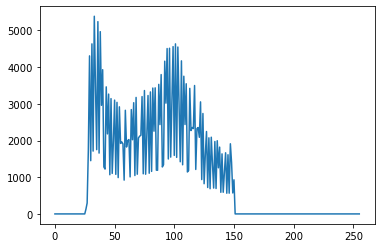

32169417 32169417


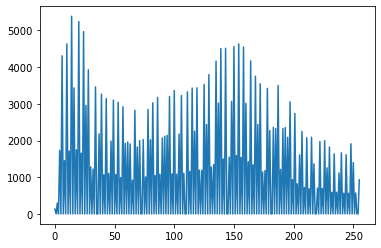

In [5]:
def histogram(img):
    sum = 0
    check = 0
    data = np.zeros((256,), dtype=int)
    x = img.shape[0]
    y = img.shape[1]
        
    for i in range(0,x):
        for j in range(0,y):        
            value = int(img[i][j])
            sum += value           
            data[value]+= 1
    #check whether get the correct sum        
    for i in range(0,256):
        check +=i*data[i]
    print(sum,check)   

    m = np.arange(0, 256,1)
    n = data
    plt.plot(m, n)
    plt.show()
        
            
    #print(data)
    
histogram(img) 

histogram(output) 

From library

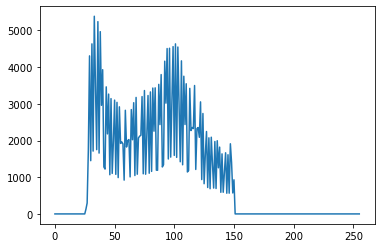

In [6]:
histogram=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram)
plt.show()

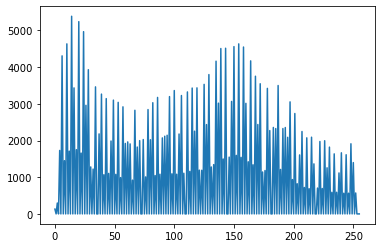

In [7]:
hist = cv2.calcHist([output],[0],None,[256],[0,255])
plt.plot(hist)
plt.show()

Question 3

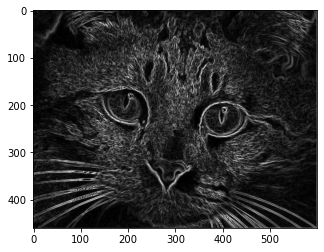

In [8]:
def SoberFilter(img):
    x = img.shape[0]
    y = img.shape[1]   
    
    Sober_F_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    Sober_F_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    S_output = img.copy()
    #cv2.imshow('image',img)
    
    img = numpy.array(img, dtype =int )

    for i in range(0,x-2):
        for j in range(0,y-2):
            #use i+3 - 3 = i rows
            S_x = np.sum(img[i:i+3, j:j+3] * Sober_F_x)
            S_y =np.sum(img[i:i+3, j:j+3] * Sober_F_y) 
            #not [i][j]
            S_output[i+1][j+1] = abs(math.sqrt(S_x*S_x+S_y*S_y))
            if S_output[i+1][j+1] <= 0:
                S_output[i+1][j+1] = 0
            elif S_output[i+1][j+1] >= 255 :
                S_output[i+1][j+1] = 255
    return S_output
            

result = SoberFilter(img)
S_output = np.uint8(result)
plt.imshow(result,'gray')

From library

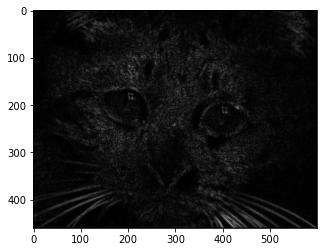

In [9]:
edges = cv2.Sobel(img,cv2.CV_16S,1,1)
# 浮点型转成uint8型
edges = cv2.convertScaleAbs(edges)
plt.figure()
plt.imshow(edges,plt.cm.gray)

Question 4

cv2.minMaxLoc(I_after_stretch) (0.0, 255.0, (79, 47), (418, 191))
cv2.minMaxLoc(H) (0.0, 66.0, (1, 0), (394, 448))
cv2.minMaxLoc(O) (0.0, 255.0, (79, 47), (208, 100))


True

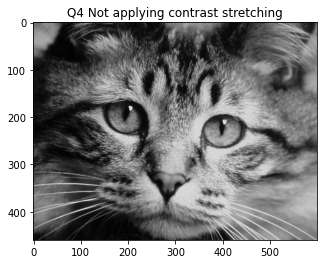

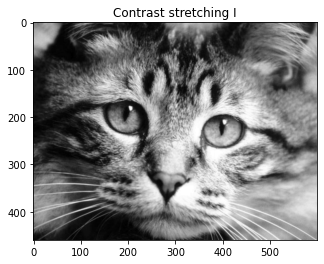

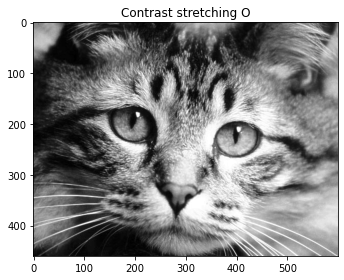

In [15]:
img = np.uint8(img)
#ksize should be both postive and odd
#sigamaX is given as 1 and sigmaY will be set to the same as sigmaX automatically
L = cv2.GaussianBlur(img,(9,9),1) 

#H = I - L
#4 ways to achieve this 
#way 1
H = np.zeros((460,600), dtype=int)
img = numpy.array(img, dtype =int )
L = numpy.array(L, dtype =int )

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        H[i][j] = img[i][j]-L[i][j]
        if H[i][j] <= 0:
            H[i][j] = 0
        elif H[i][j] >= 255 :
            H[i][j] = 255
#print('cv2.minMaxLoc(H)',cv2.minMaxLoc(H))
#O= I + aH
#way 2 
O = img + 1.25*H
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if O[i][j] <= 0:
            O[i][j] = 0
        elif O[i][j] >= 255 :
            O[i][j] = 255
#print('cv2.minMaxLoc(H)',cv2.minMaxLoc(O))
#way3
#O = cv2.addWeighted(img, 1, H, 1.25, 0)
#way4
#H_1 = cv2.subtract(img,L)

plt.figure(1)
plt.title('Q4 Not applying contrast stretching')
plt.imshow(O,'gray')
cv2.imwrite('Q4_Not_applying_contrast_stretching.png', O)

plt.figure(2)
 
plt.title('Contrast stretching I')
I_after_stretch = stretch(img)
print('cv2.minMaxLoc(I_after_stretch)',cv2.minMaxLoc(I_after_stretch))
plt.imshow(I_after_stretch,'gray')
cv2.imwrite('Contrast_stretching_I.png', I_after_stretch)
I_after_stretch = np.uint8(I_after_stretch)

L_after_stretch = cv2.GaussianBlur(I_after_stretch,(9,9),1) 

#H = I - L
H = np.zeros((460,600), dtype=int)
I_after_stretch = numpy.array(I_after_stretch, dtype =int )
L_after_stretch = numpy.array(L_after_stretch, dtype =int )

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        H[i][j] = I_after_stretch[i][j]-L_after_stretch[i][j]
        if H[i][j] <= 0:
            H[i][j] = 0
        elif H[i][j] >= 255 :
            H[i][j] = 255

#O= I + aH
O = I_after_stretch + 1.25*H
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if O[i][j] <= 0:
            O[i][j] = 0
        elif O[i][j] >= 255 :
            O[i][j] = 255
print('cv2.minMaxLoc(H)',cv2.minMaxLoc(H))
print('cv2.minMaxLoc(O)',cv2.minMaxLoc(O))            
plt.figure(3)
plt.title('Contrast stretching O')
plt.tight_layout()
plt.imshow(O,'gray')
cv2.imwrite('Contrast_stretching_O.png', O)
#plt.imshow(L,'gray')


cv2.minMaxLoc(H) (0.0, 32.0, (1, 0), (393, 447))
cv2.minMaxLoc(O) (26.0, 173.0, (79, 47), (96, 341))
cv2.minMaxLoc(I_after_stretch) (0.0, 255.0, (79, 47), (418, 191))
cv2.minMaxLoc(H) (0.0, 66.0, (1, 0), (394, 448))
cv2.minMaxLoc(O) (0.0, 255.0, (79, 47), (208, 100))


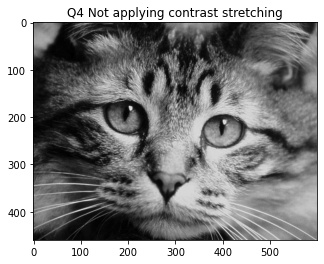

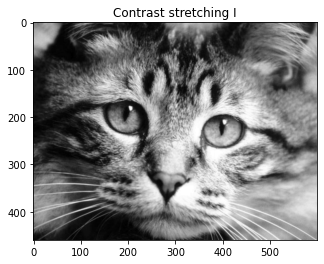

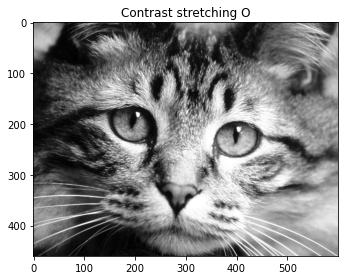

In [14]:
img = np.uint8(img)
L = cv2.GaussianBlur(img,(9,9),1) 
H = cv2.addWeighted(img, 1, L, -1, 0)
O = cv2.addWeighted(img, 1, H, 1.25, 0)
print('cv2.minMaxLoc(H)',cv2.minMaxLoc(H))
print('cv2.minMaxLoc(O)',cv2.minMaxLoc(O))
plt.figure(1)
plt.title('Q4 Not applying contrast stretching')
plt.imshow(O,'gray')


plt.figure(2)
 
plt.title('Contrast stretching I')
I_after_stretch = stretch(img)
plt.imshow(I_after_stretch,'gray')

I_after_stretch = np.uint8(I_after_stretch)

L_after_stretch = cv2.GaussianBlur(I_after_stretch,(19,25),1) 

#H = I - L
H = np.zeros((460,600), dtype=int)
#I_after_stretch = numpy.array(I_after_stretch, dtype =int )
#guess that when use addweighted, it is a calculation between two images
#do not set images to numpy.array()
#or the result will out of the range
print('cv2.minMaxLoc(I_after_stretch)',cv2.minMaxLoc(I_after_stretch))
#L_after_stretch = numpy.array(L_after_stretch, dtype =int )

H = cv2.addWeighted(I_after_stretch, 1, L_after_stretch, -1, 0)

#O= I + aH
O = cv2.addWeighted(I_after_stretch, 1, H, 1.25, 0)
print('cv2.minMaxLoc(H)',cv2.minMaxLoc(H))
print('cv2.minMaxLoc(O)',cv2.minMaxLoc(O))            
plt.figure(3)
plt.title('Contrast stretching O')
plt.tight_layout()
plt.imshow(O,'gray')


sum_H= 22885234
sum_H0= 22885234
sum_H1= 22885234
sum_H2= 22885234
(0.0, 32.0, (1, 0), (393, 447))
(0.0, 32.0, (1, 0), (393, 447))
(0.0, 32.0, (1, 0), (393, 447))
(0.0, 32.0, (1, 0), (393, 447))


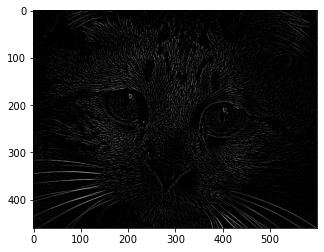

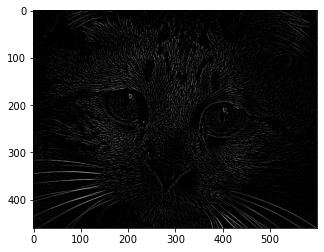

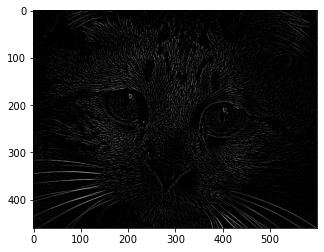

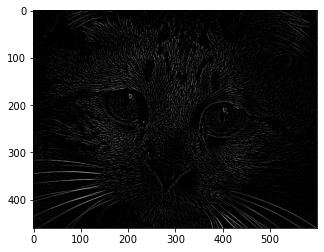

In [12]:
#ksize is close to img.shape[0]/img.shape[1], and they are both postive and odd
#sigamaX is given as 1 and sigmaY will be set to the same as sigmaX automatically
L = cv2.GaussianBlur(img,(19,25),1) 

sum_img = 0
sum_L = 0
sum_H = 0
sum_H0 = 0
sum_H1 = 0
x= img.shape[0]
y = img.shape[1]

#H = I - L
H = np.zeros((460,600), dtype=int)
img1 = numpy.array(img, dtype =int )
L1 = numpy.array(L, dtype =int )
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        H[i][j] = img1[i][j]-L1[i][j]
        if H[i][j] <= 0:
            H[i][j] = 0
        elif H[i][j] >= 255 :
            H[i][j] = 255
            
for i in range(0,x):
    for j in range(0,y):        
        value = int(img[i][j])
        sum_H += value
print('sum_H=',sum_H)
plt.figure(1)
plt.imshow(H,'gray')    

#H = I - L
H_0 = cv2.addWeighted(img, 1, L, -1, 0)
plt.figure(2)
plt.imshow(H_0,'gray') 
for i in range(0,x):
    for j in range(0,y):        
        value = int(img[i][j])
        sum_H0 += value
print('sum_H0=',sum_H0)



H_1 = cv2.subtract(img,L)
plt.figure(3)
plt.imshow(H_1,'gray')
for i in range(0,x):
    for j in range(0,y):        
        value = int(img[i][j])
        sum_H1 += value
print('sum_H1=',sum_H1)


img1 = numpy.array(img, dtype =int )
L1 = numpy.array(L, dtype =int )
H_2 = img1 - L1
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if H_2[i][j] <= 0:
            H_2[i][j] = 0
        elif H_2[i][j] >= 255 :
            H_2[i][j] = 255
plt.figure(4)
plt.imshow(H_2,'gray')
sum_H2 = 0
for i in range(0,x):
    for j in range(0,y):        
        value = int(img[i][j])
        sum_H2 += value
print('sum_H2=',sum_H2)

print(cv2.minMaxLoc(H))
print(cv2.minMaxLoc(H_0))
print(cv2.minMaxLoc(H_1))
print(cv2.minMaxLoc(H_2))